In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy

In [17]:
img_1 = cv2.imread('picture1.png')
img_2 = cv2.imread('picture2.jpg')


In [20]:
row,col,channel = img_2.shape

In [21]:
roi = img_1[:row,:col]

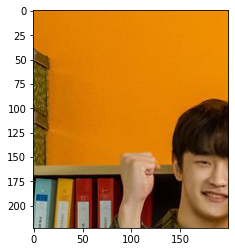

In [22]:
plt.imshow(roi[...,::-1])

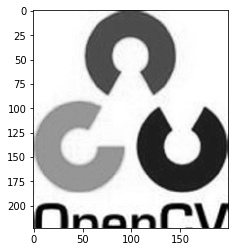

In [24]:
#将图片转化为灰度图片
img_2_gray = cv2.cvtColor(img_2,cv2.COLOR_BGR2GRAY)
plt.imshow(img_2_gray,'gray')

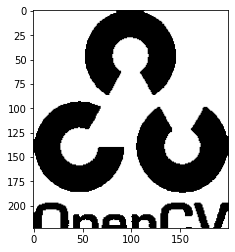

In [27]:
#使用二值化函数将灰度图片二值化
ret, mask = cv2.threshold(img_2_gray,175,255,cv2.THRESH_BINARY)
plt.imshow(mask,'gray')

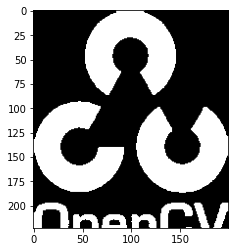

In [29]:
#使用“非”操作函数 将上图黑白颠倒
mask_reverse = cv2.bitwise_not(mask)
plt.imshow(mask_reverse, 'gray')

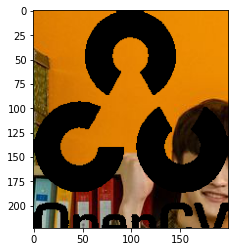

In [30]:
#使用“与” 操作函数对图像掩膜
img_1_new = cv2.bitwise_and(roi,roi,mask=mask)
plt.imshow(img_1_new[...,::-1])

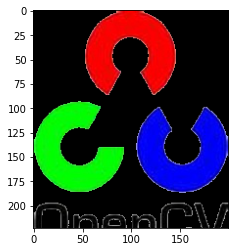

In [32]:
#对img_2 进行掩膜
img_2_new = cv2.bitwise_and(img_2,img_2,mask = mask_reverse)
plt.imshow(img_2_new[...,::-1])

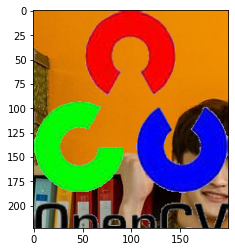

In [33]:
#将两图融合
dst = cv2.add(img_1_new,img_2_new)
plt.imshow(dst[...,::-1])

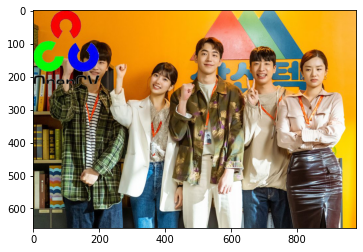

In [34]:
#result
img_1[:row,:col]=dst
plt.imshow(img_1[...,::-1])